In [1]:
# Carga de las librerías
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Análisis exploratorio de los datos de expresión transcriptómica
Se va a realizar el análisis exploratorio de los datos de expresión transcriptómica obtenidos a partir de microarrays Clariom D Human de Affymetrix. No obstante, el análisis exploratorio de hace sobre los datos ya preprocesados. Cabe destacar que el preprocesamiento de estos se ha realizado en dos partes:

1. Un primer preprocesamiento, llevado a cabo en el entorno de R, ha sido realizado empleadno el método RMA (Robust Multi-array Average) con el paquete `oligo`. Este método incluye corrección de fondo, normalización entre arrays mediante cuantiles y resumen a nivel de probeset mediante la mediana de los valores de expresión de los probesets (notebooks/prep_R.ipynb).

2. Un segundo preprocesado de los datos, a partir de lo obtenido tras el preprocesado anterior, se ha realizado en el entorno de Python. Aquí se han llevado a cabo diferentes pasos:
- Reordenamiento de las filas de la matriz de covariables para que sigan un orden concreto (notebooks/prep.ipynb). En concreto, el orden es: muestras de colonocitos normales sin tratar, muestras de colonocitos normales tratadas con DFMO, muestras de células de cáncer de colon sin tratar y muestras de células de cáncer de colon tratadas con DFMO.
- Reordenamiento de las columnas de la matriz de expresión para que sigan el mismo orden que las filas de la matriz de covariables (notebooks/prep.ipynb).
- Mapeo de los probesets a símbolos de genes, resumiendo los valores de expresión de los probesets asociados a un mismo gen mediante la mediana de sus valores de expresión (notebooks/prep.ipynb).

En cuanto al diseño experimental, como se puede extraer a partir de lo explicado en el segundo preprocesado, se dipone de datos de expresión transcriptómica de lineas celulares tanto de cáncer de colon como de colonocitos normales. Además, de cada una de ellas, se tienen muestras tratadas y sin tratar con DFMO, un inhibidor suicida de la ODC (ornitin descarboxilasa).

## Lectura de datos

In [2]:
# Lectura datos expresion
df_expresion = pd.read_csv("../data/matriz_expr_symbol_median.csv", index_col=0)
# Lectura covariables
df_covariables = pd.read_csv("../data/matriz_covariables_ordenada.csv", index_col=0)

In [3]:
print(f"A continuación, se muestran las primeras filas de la matriz de covariables (de dimensiones {df_covariables.shape}):\n")
df_covariables

A continuación, se muestran las primeras filas de la matriz de covariables (de dimensiones (12, 6)):



,Dia,Linea,Tratamiento,Trt,Trtb,ID
SampleID,,,,,,
EH031TC,1,HT29,Control,HT29Control,HT29Control,3
EH072TC,2,HT29,Control,HT29Control,HT29Control,7
EH113TC,3,HT29,Control,HT29Control,HT29Control,11
EH041TT,1,HT29,DFMO,HT29DFMO,HT29DFMO,4
EH082TT,2,HT29,DFMO,HT29DFMO,HT29DFMO,8
EH123TT,3,HT29,DFMO,HT29DFMO,HT29DFMO,12
EH011SC,1,NCM460,Control,NCM460Control,NCM460Control,1
EH052SC,2,NCM460,Control,NCM460Control,NCM460Control,5
EH093SC,3,NCM460,Control,NCM460Control,NCM460Control,9


In [4]:
print(f"\nA continuación, se muestran las primeras filas de la matriz de expresión (de dimensiones {df_expresion.shape}):\n")
df_expresion


A continuación, se muestran las primeras filas de la matriz de expresión (de dimensiones (15394, 12)):



,EH031TC,EH072TC,EH113TC,EH041TT,EH082TT,EH123TT,EH011SC,EH052SC,EH093SC,EH021ST,EH062ST,EH103ST
SYMBOL,,,,,,,,,,,,
A1BG,5.449244,5.600217,5.877395,5.514377,5.238311,5.432059,5.549615,4.831173,5.440019,5.012775,5.003166,5.240926
A1BG-AS1,4.517206,4.984858,5.179388,5.040980,4.583564,4.746291,5.100337,4.598045,5.019639,4.776106,4.912688,5.166266
A1CF,3.028082,3.099345,3.610803,2.161914,3.218331,3.214287,4.124268,4.679797,3.759841,5.972657,5.677481,5.242860
A2M,2.892565,3.337399,3.647884,3.569924,2.921439,3.289451,4.688244,4.264133,4.001193,4.593412,3.954397,3.869023
A2M-AS1,4.949196,5.195166,4.854071,5.151646,4.726754,5.281501,4.584950,4.532729,4.983989,4.521873,4.143182,4.871354
...,...,...,...,...,...,...,...,...,...,...,...,...
ZXDC,9.491670,9.388956,9.231111,8.987552,9.079141,8.956260,8.090298,8.294008,7.998046,8.263845,8.403261,8.435269
ZYG11A,3.541596,3.789714,3.578024,3.496283,3.151407,4.036212,3.975672,3.106998,4.024628,4.212930,3.997563,4.177297
ZYX,9.264440,10.099658,10.135763,10.322851,10.196026,9.780070,8.927923,8.915834,8.704708,9.095980,8.898511,8.882835


Es interesante también ver estos valores con un heatmapa para observar si existen patrones de expresión similares entre las muestras. Para ello, se escala la expresión génica por filas (genes) y se representa un heatmap de los datos escalados. Además, con el fin de encontrar agrupamientros, este heatmap se acompaña de un análisis de clúster jerárquico: en las filas se agrupan los genes y en las columnas las muestras.

c:\Users\Emodoro\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
c:\Users\Emodoro\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


<Figure size 1000x1500 with 0 Axes>

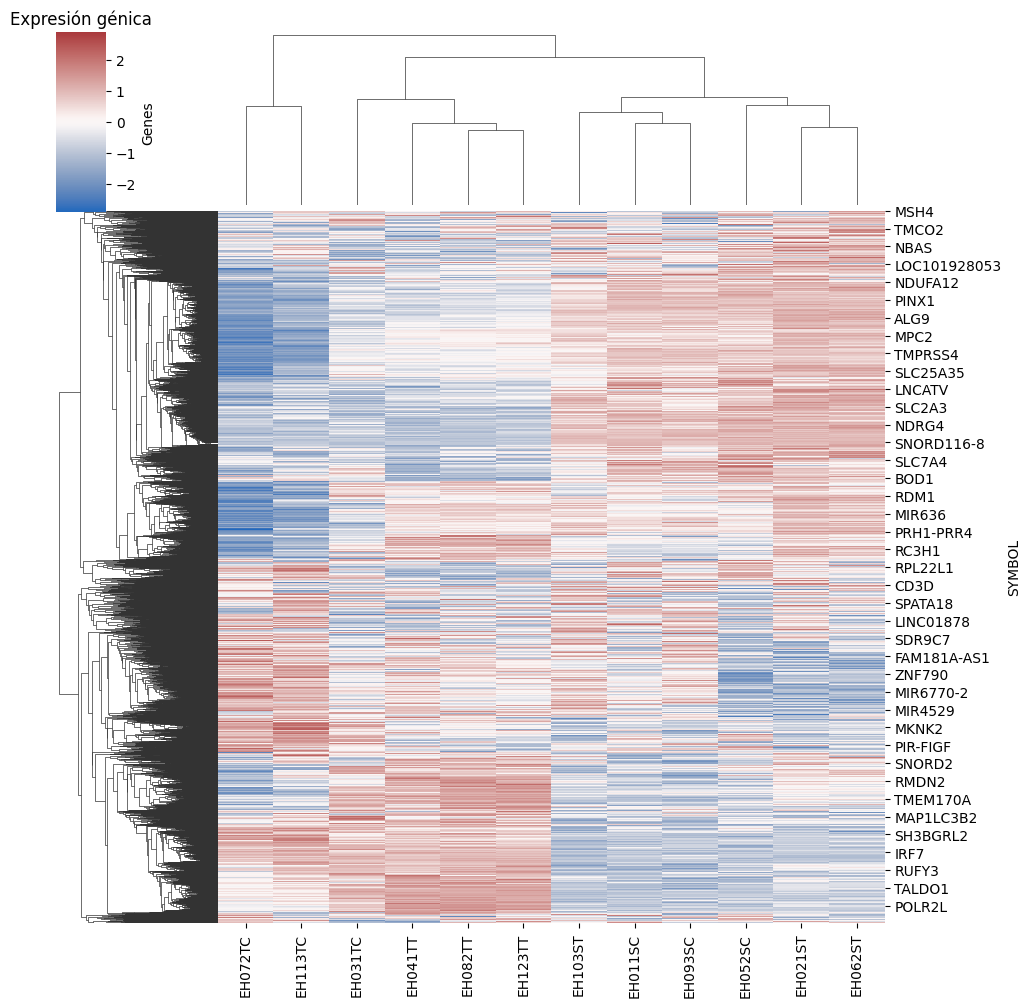

In [5]:
# Heatmap de la expresión
# escalar la expresión génica por filas (genes)
df_expresion_escalada = (df_expresion.T - df_expresion.mean(axis=1)) / df_expresion.std(axis=1)
plt.figure(figsize=(10, 15))
# Heatmap con clustering activado
sns.clustermap(df_expresion_escalada.T, cmap="vlag", center=0, cbar_kws={"label": "Z-score"})
plt.ylabel("Genes")
plt.title("Expresión génica")
plt.show()

En el heatmap anterior se puede intuirse cómo, en primer lugar, las líneas muestras se agrupan, en primer lugar, en función de la línea celular, algo esperable y que podría ayudar a corroborar que el experimento se ha realizado adecuadamente. Esto sugiere que la variabilidad entre líneas celulares es mayor que la variabilidad inducida por el tratamiento con DFMO. Además, dentro de una misma línea celular, las muestras tratadas con DFMO parecen agruparse y diferenciarse de las no tratadas, si bien es cierto que estas diferencias son más notables dentro de la línea celular tumoral. Es más, dentro de la línea normal la separación de las tratadas vs. las no tratadas no parece tan clara; de hecho, aparecen mezcladas entre ellas. 

Además, se puede observar que existen ciertos genes que parecen mostrar patrones de expresión similares entre las diferentes muestras, lo que podría indicar la presencia de co-regulación o participación en vías biológicas comunes. Por ello, más adelante se realizará una reducción de la dimensionalidad mediante PCA para observar si estos patrones pueden ser capturados por las componentes principales y, en caso afirmativo, si estas diferencias se asocian a las covariables del experimento (línea celular, tratamiento con DFMO, día del experimento...).


## Distribución de los datos

Aunque es esperable que existan genes diferencialmente expresados (DEGs) entre las distintas condiciones biológicas, la distribución global de los niveles de expresión debería ser similar entre todas las muestras. En este contexto, se considera la expresión génica como una variable aleatoria y a cada gen como una observación o individuo de dicha distribución. La similitud u homogeneidad en la forma general de las distribuciones (centralización, dispersión, curtosis, asimetría...) garantiza que las diferencias detectadas entre condiciones reflejen verdaderos cambios biológicos y no sesgos técnicos o deficiencias en la normalización.  

Una representación interesante puede ser la distribución kernel o los histogramas. 

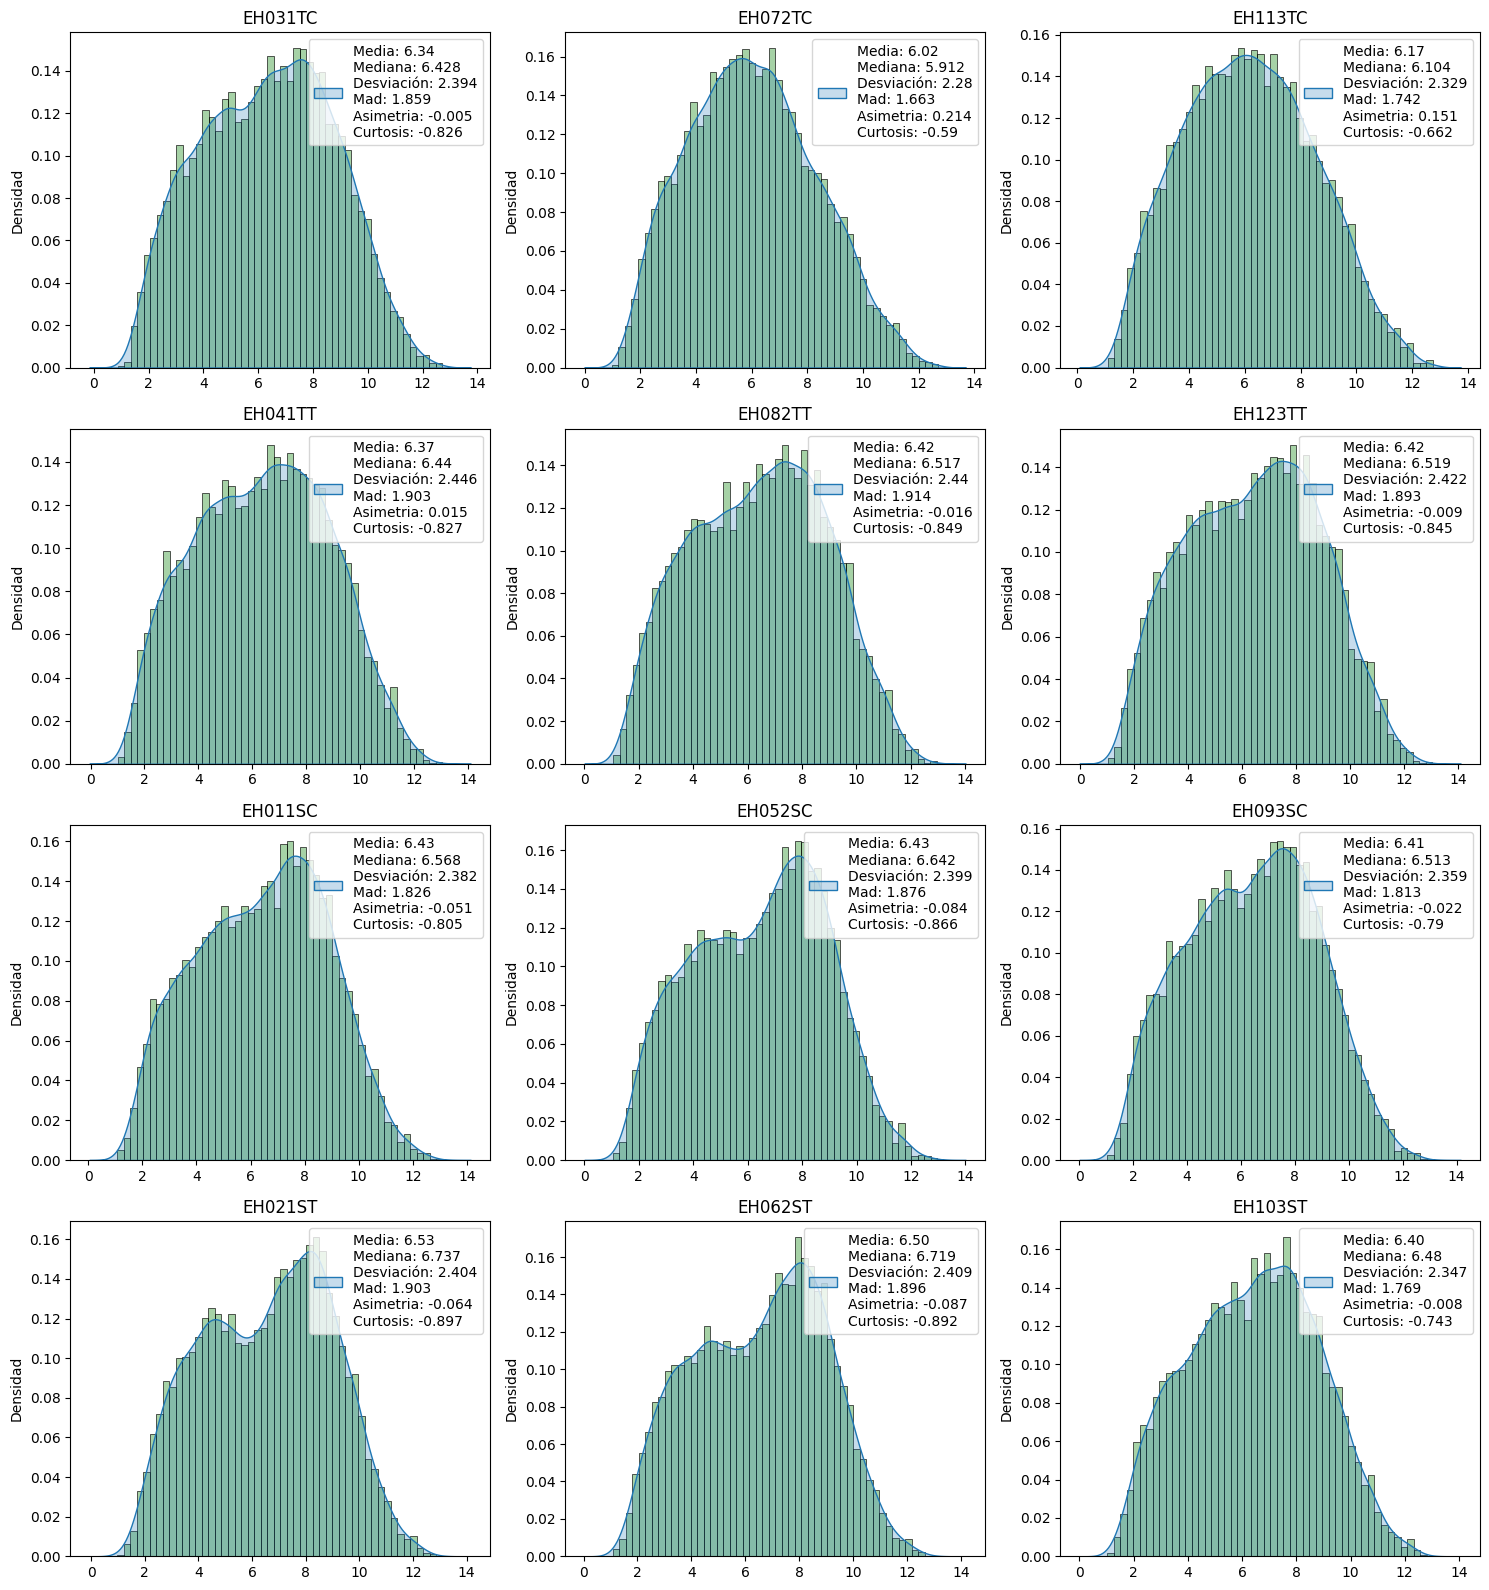

In [6]:
# Definir parámetros para el gráfico
columnas_df_expresion = df_expresion.columns
n_cols = 3 # Subplots en cada fila dentro de la figura
n_rows = int(np.ceil(len(columnas_df_expresion) / n_cols)) # Subplots en cada columna de la figura

# Crear el "fondo" de la figura
fig = plt.figure(figsize=(5 * n_cols, 4 * n_rows)) 

for axe, col in enumerate(columnas_df_expresion, start = 1):
    # Estadística De
    media = round(df_expresion[col].mean(), ndigits = 3)
    mediana = round(df_expresion[col].median(), ndigits = 3)
    des = round(df_expresion[col].std(), ndigits = 3)
    mad = round(
        (df_expresion[col] - mediana).abs().median(), 
        ndigits = 3)
    curtosis = round(df_expresion[col].kurtosis(), ndigits = 3)
    asimetria = round(df_expresion[col].skew(), ndigits = 3)

    leyenda = f"Media: {media:.2f}\nMediana: {mediana}\nDesviación: {des}\nMad: {mad}\nAsimetria: {asimetria}\nCurtosis: {curtosis}"


    plt.subplot(n_rows, n_cols, axe)
    sns.histplot(df_expresion[col], bins = 50, stat = "density", color="g", alpha=0.35)
    sns.kdeplot(data = df_expresion, x = col, fill = True, label = leyenda)
    plt.title(col)
    plt.xlabel("")
    plt.ylabel("Densidad")
    plt.legend(loc="upper right")

plt.tight_layout()




Como puede observarse, la distribución de la expresión bastante similar en los diferentes días (columnas de la figura), lo que sugiere que la normalización ha sido efectiva y que las diferencias observadas entre condiciones probablemente reflejan cambios biológicos genuinos.

En cuanto a las diferencias observadas entre condiciones (filas), parece que ambas líneas muestras una mayor mezcla de distribuciones tras el tratamiento con DFMO (curtosis más cercanas al -1), lo que podría indicar que el tratamiento induce cambios en la expresión génica que afectan a un conjunto más amplio de genes o que los cambios son más sutiles y distribuidos. A su vez, también parece que las líneas celulares sanas presetan una mezcla de distribuciones más marcada que las cancerígenas, tanto tratadas como no tratadas. Esto podría sugerir que las células normales tienen, por un lado, una mayor diversidad en la expresión génica basal, y por otro lado, una respuesta más heterogénea al tratamiento con DFMO en comparación con las células cancerosas.

## Filtrado no específico

Tras observar que la distribución de la expresión es similar para todas las muestras, se procede a filtrar los genes mediante un filtrado no específico:

1. Se calcula la mediana de expresión de cada gen (fila), $med_i$.
2. Se calcula el IQR de expresión de cada gen, $IQR_i$.
3. Se calcula el Q1 de las medianas, $med_{Q1}$ y de los IQR, $IQR_{Q1}$.
4. Se mantienen aquellos genes tal que $med_i \ge med_{Q1} Y IQR_i \ge IQR_{Q1}$


In [7]:
# Medianas de expresión de cada gen
med_exp = np.median(df_expresion, axis = 1)
# Q1 de las medianas de expresión
q1_med_exp = np.quantile(med_exp, q = 0.25)
# Cantidad de genes que tienen una mediana de expresión superior al Q1 de las medianas de exp
n_genes_sup_med_exp = (med_exp >= q1_med_exp).sum()
print(f"Hay {n_genes_sup_med_exp} genes con una expresión mediana superior al Q1 de las medianas de expresión, {q1_med_exp.round(2)}. ")


Hay 11545 genes con una expresión mediana superior al Q1 de las medianas de expresión, 4.55. 


In [8]:
# IQR de expresión de cada gen
q3_exp = np.quantile(df_expresion, q = 0.75, axis = 1)
q1_exp = np.quantile(df_expresion, q = 0.25, axis = 1)
iqr_exp = q3_exp - q1_exp
# Q1 de los IQR de expresión
q1_iqr_exp = np.quantile(iqr_exp, q = 0.25)
# Cantidad de genes que tienen un IQR de expresión superior al Q1 de los IQR de expresión
n_genes_sup_iqr_exp = (iqr_exp >= q1_iqr_exp).sum()
print(f"Hay {n_genes_sup_iqr_exp} genes con un IQR de expresión superior al Q1 de los IQR de expresión, {q1_iqr_exp.round(2)}. ")

Hay 11545 genes con un IQR de expresión superior al Q1 de los IQR de expresión, 0.4. 


In [9]:
# Filtrado de genes
filtro = (iqr_exp >= q1_iqr_exp) & (med_exp >= q1_med_exp)
df_exp_filt = df_expresion.loc[filtro, :]
print(f"De los {len(filtro)} genes, se conservan {filtro.sum()}.")

De los 15394 genes, se conservan 9073.


## PCA

Anteriormente, se realizó un heatmap de los niveles de expresión normalizados junto con un análisis de cluster jerárquico con el fin de identificar patrones de expresión génica. De hecho, se vio un claro patrón de agrupamiento entre las líneas celulares y, además, entre las células tratadas o no tratadas, si bien es cierto que esto último fue más evidente en la línea celular tumoral.

Ahora, para evaluar si existen patrones de expresión génica asociados a las covariables del experimento (línea celular, tratamiento con DFMO, día del experimento...), se va a llevar a cabo un análisis de componentes principales (PCA) con el fin de capturar la mayor parte de la variabilidad de los datos en un espacio de menor dimensión. En particular, se va a observar si las primeras componentes principales (CP) son capaces de discriminar entre las diferentes condiciones biológicas.

Para ello, se van a seguir los siguientes pasos:

1. En primer lugar, se van a obtener las componentes principales considerando como variables originales los genes. Por ello, es necesario emplear la traspuesta de la matriz, pues estos están en las filas y han de pasar a ser columnas.

In [10]:
# Trasponer el DataFrame y pasar a array
X = df_exp_filt.T.values                      # Trasponer y convertir a array (para scikit-learn)
sample_names = df_exp_filt.columns.to_list()  # Lista con los nombres de las muestras
gene_names = df_exp_filt.index.to_list()      # Lista con los nombres de las sondas
linea = df_covariables["Linea"].to_list()      # Lista con el valor de la línea celular de cada muestra
tratamiento = df_covariables["Tratamiento"].to_list() # Lista con el valor del tto de cada muestra.

2. A continuación, se escalan los datos, lo que se conoce como *z-scores*.

In [11]:
# ! pip install scikit-learn
import sklearn.preprocessing as pre

# Primero se crea un objeto, un escalador, para indicar cómo comportarse después. Podría hacerse
# todo en una misma línea, pero de esta manera el escalador (objeto) podrá reutilizarse.
escalador = pre.StandardScaler(with_mean = True, with_std = True)

# Es posible usar 'fit_transform() para realizar la obtenión de mean y std y la transformación 
# directamente. También podría hacerse por pasos, primero 'fit' para guardar las medias y std en
# el objeto después 'transform' sobre el objeto.
# escalador.fit(X)
# escalador.transform(X)
Xz = escalador.fit_transform(X) # z scores

print('Los valores z-scores, mostrados como matriz transpuesta, son')
XzT_df = pd.DataFrame(Xz.T, columns =sample_names, index = gene_names)
XzT_df

Los valores z-scores, mostrados como matriz transpuesta, son


,EH031TC,EH072TC,EH113TC,EH041TT,EH082TT,EH123TT,EH011SC,EH052SC,EH093SC,EH021ST,EH062ST,EH103ST
A2M-AS1,0.419277,1.195687,0.119013,1.058316,-0.282869,1.468205,-0.730474,-0.895312,0.529103,-0.929582,-2.124930,0.173566
A4GALT,0.763242,0.357929,-0.245030,1.790368,1.033840,1.470383,-0.867004,-1.370210,-0.721324,-0.648568,-0.796870,-0.766756
AAAS,-0.744390,-1.881353,-1.446884,-0.498755,-0.534780,-0.318449,1.199659,0.821515,0.962981,0.752078,1.112919,0.575459
AADACP1,0.684355,-1.081010,-0.579667,1.684115,1.644013,1.323981,-0.766604,-0.151283,-0.641187,-0.710168,-0.371683,-1.034863
AADAT,-0.714717,-1.273165,-1.458823,-0.842513,-0.718672,-0.825919,0.926382,1.106063,0.765948,1.135115,1.136309,0.763993
...,...,...,...,...,...,...,...,...,...,...,...,...
ZXDB,-0.919229,-0.564371,0.003540,-2.169091,0.002847,-0.941433,0.455275,0.707865,0.101409,1.726094,1.167225,0.429869
ZXDC,1.534230,1.330467,1.017337,0.534169,0.715861,0.472091,-1.245791,-0.841674,-1.428797,-0.901510,-0.624939,-0.561442
ZYX,-0.288395,1.120687,1.181600,1.497232,1.283269,0.581516,-0.856128,-0.876523,-1.232710,-0.572602,-0.905749,-0.932196
ZZEF1,0.389761,-2.235968,-0.106582,0.093696,-0.887998,0.067109,0.168401,1.614635,-0.533991,0.989646,1.230109,-0.788817


    Como puede comprobarse, las variables tienen, efectivamente, media 0 y varianza 1 (solo se muestra para las 10 primeras sondas):

In [12]:
print("Medias:\n")
print(XzT_df.T.iloc[:, 0 : 10].mean())
print("\nVarianzas:\n")
print(XzT_df.T.iloc[:, 0 : 10].var())

Medias:

A2M-AS1    9.205599e-16
A4GALT     1.434038e-15
AAAS       1.693090e-15
AADACP1   -2.035409e-16
AADAT      1.850372e-16
AAK1      -1.720846e-15
AAMDC      1.850372e-17
AARS1     -7.308968e-16
AASDH      4.672189e-16
AATF      -2.618276e-15
dtype: float64

Varianzas:

A2M-AS1    1.090909
A4GALT     1.090909
AAAS       1.090909
AADACP1    1.090909
AADAT      1.090909
AAK1       1.090909
AAMDC      1.090909
AARS1      1.090909
AASDH      1.090909
AATF       1.090909
dtype: float64


3. El siguiente paso es hacer el PCA sobre los z scores.

In [13]:
from sklearn.decomposition import PCA
# Se crea un objeto donde se define el análisis PCA que se va a hacer.
# - Se emplea el método SVD exacto.
pca = PCA(svd_solver = "full")

# 
scores = pca.fit_transform (Xz)

var_exp = pca.explained_variance_ # Varianza explicada (autovalores)
var_exp_p = pca.explained_variance_ratio_ # % de varianza explicada

pc = pca.n_components_ # Componentes principales (autovectorees)


4. Representar las 2 primeras componentes:

In [14]:
import plotly.express as px
df_pca = pd.DataFrame({
    'PC1': -scores[:, 0],
    'PC2': scores[:, 1],
    'PC12': scores[:, 11],
    'Linea': df_covariables["Linea"],
    'Trt': df_covariables["Tratamiento"],
    'TrtLinea': df_covariables["Tratamiento"] + " - " + df_covariables["Linea"],
    'Dia': df_covariables["Dia"]
})
fig = px.scatter(
    df_pca,
    x="PC1",
    y="PC2",
    color="Linea",
    symbol = "Trt",
    hover_data=df_pca,
    title="PCA",
    labels={
        "PC1": f"PC1 ({(var_exp_p[0]*100).round(2)} %)",
        "PC2": f"PC2 ({(var_exp_p[1]*100).round(2)} %)"
    }
)
# Ejes
rango = max(abs(df_pca["PC1"]).max(), abs(df_pca["PC2"]).max())
fig.update_xaxes(range=[-rango*1.1, rango*1.1], zeroline=True, zerolinecolor="gray")
fig.update_yaxes(range=[-rango*1.1, rango*1.1], zeroline=True, zerolinecolor="gray", scaleanchor="x", scaleratio=1)
fig.update_traces(marker=dict(size=10, line=dict(width=1, color='black')))
fig.update_layout(width=700, height = 700)
fig.show()

Como puede observarse, la CP1 es capaz de discriminar perfectamente entre las dos líneas celulares presentes en el experimento: HT29 (cáncer de colon) y NCM460 (mucosa de colon normal). Esto sugiere que la variabilidad entre líneas celulares es la fuente principal de variabilidad en los datos. Además, también se puede observar cómo la CP2 es capaz de discriminar, en cierta medida, entre las muestras tratadas y no tratadas con DFMO, especialmente dentro de la línea celular tumoral. Esto indica que el tratamiento con DFMO induce cambios en la expresión génica que son capturados por esta componente principal.

### Detección multivariante de outliers. Distancia de Mahalanobis sobre PC

En este apartado se va a llevar a cabo la detección de potenciales *outliers* desde un enfoque multivariante que considere, además, la correlación y varianza entre las diferentes variables. Para ello, se va a recurrir a la *Distancia de Mahalanobis*, pues, a diferencia de la distancia euclídea, esta sí tiene en cuenta tanto la varianza de cada variable (gen) como la correlación entre ellas. De esta manera, todas las variables tendrán el mismo peso (escalado) y se podrá detectar *outliers* no solo desde un punto de vista marginal, gen a gen, sino también considerando la estructura de correlación subyacente entre ellos. 

No obstante, para eliminar posible ruido y que la detección de *outliers* sea más estable, la distancia de Mahalanobis se obtendrá no sobre el espacio vectorial original, sino sobre el espacio reducido tras la aplicación de PCA. De esta manera, como variables se considerarán las PC que explique, al menos, un 70 % de la varianza. No obstante, cabe destacar que algunos autores sugieren que con 4 CP bastaría.

In [15]:
# Suma acumulada de las varianzas explicadas por cada CP
var_exp_acum = var_exp_p.cumsum()
# Componentes con una varianza explicada acumulada inferior al 70 %
n_comp = len(var_exp_acum[var_exp_acum < 0.7]) + 1
print(f"Son necesarias {n_comp} CP para explicar al menos el 70 % de la varianza; en concreto, el {(var_exp_acum[n_comp]*100).round(1)} %")

Son necesarias 2 CP para explicar al menos el 70 % de la varianza; en concreto, el 83.7 %


A continuación, se obtiene la distancia de Mahalanobis de cada muestra al centro en el espacio de las primeras 6 CP.

$$D_M^2=diag\left[\left(S-1\bar{S}\right)\Sigma^{-1}\left(S-1\bar{S}\right)^T\right]$$

Siendo $\Sigma^{-1}$ la matriz de varianzas y covarianzas de las CP y $\left(S-1\bar{S}\right)$ es la matriz de datos centrados en torno al origen del espacio de CP.  Hay que tener en cuenta que las CP presentan correlación nula entre ellas (son ortogonales), por lo que bastará con restar la media y dividir entre la varianza en lugar de entre la matriz de varianzas-covarianzas. Así, siendo $S_{ij}$ los scores de la muestra *i* en la CP *j* (valores de la muestra en el espacio de las CP), $S_j$ la media de los Scores de la CP *j* y $\lambda_j$ la varianza de la CO *j*:

$$D_{M, i}^2=\sum^k_{j=1}\frac{\left(S_{ij}-\bar{S}_j\right)^2}{\lambda_j}$$

Además, de cara a una detección objetiva de outliers multivariantes, cabe destacar que esta distancia sigue una $D_M^2\sim\chi^2_{n\_comp}$. 

Así, fijando un nivel de significación $\alpha=0.05$, se tiene lo siguiente:

In [16]:
from scipy.stats import chi2
# Scores de cada muestra para cada una de las CP seleccionadas
Sij = scores[:, : n_comp]
# Varianza explicada por cada una de las n_comp componentes seleccionadas
lamj = var_exp[: n_comp]
# Sj media para cada componente
Sjmed = Sij.mean(axis = 0)

# Dm2: Distancia de Mahalanobis por muestra:
# - Como Sjmed.shape = (n_comp,), y Sij.shape = (sample, n_comp), se resta a cada fila el 
#   mismo vector Sjmed (broadcasting efectivo). Igual para dividir por lamj.
# - axis = 1 para hacer la suma por filas
Dm2 = (pd.DataFrame(np.sum((Sij - Sjmed)**2/lamj, axis=1), index=sample_names, columns = ["Dm2"]))

# Nivel de significación
alpha = 0.05

# Valor crítico
chi2_critico = chi2.ppf(1 - alpha, df = n_comp)
Dm2["Chi2 Critico"] = chi2_critico 
# Probabilidad
Dm2["p valor"] = chi2.sf(Dm2["Dm2"], df = n_comp)
# Outliers
Dm2["outliers"] = np.where(Dm2["Dm2"] > chi2_critico, "Sí", "No")
total_outliers = sum(Dm2["Dm2"] > chi2_critico)
# Resultados
Dm2


,Dm2,Chi2 Critico,p valor,outliers
EH031TC,0.686522,5.991465,0.709453,No
EH072TC,5.072113,5.991465,0.079178,No
EH113TC,3.158811,5.991465,0.206098,No
EH041TT,2.092614,5.991465,0.351232,No
EH082TT,2.344196,5.991465,0.309716,No
EH123TT,2.192420,5.991465,0.334135,No
EH011SC,1.149029,5.991465,0.562978,No
EH052SC,1.199068,5.991465,0.549067,No
EH093SC,1.044632,5.991465,0.593145,No
EH021ST,1.256783,5.991465,0.533449,No


In [17]:
print(f"Cómo puede observarse en la tabla anterior, la cantidad de outliers es {total_outliers}.")

Cómo puede observarse en la tabla anterior, la cantidad de outliers es 0.


## Correlación de los genes con las CP

Para una primera visión global, se va a ver cómo se correlacionan los genes con cada una de las CP. Para ello, se recurrirá a la correlación de Pearson (puesto que es la que se emplea para realizar el PCA) y a un heatmap. No obstante, es cierto que podría pensarse en calcular la correlación de Spearman dada su robustez frente a posibles outliers y a la violación del supuesto de normalidad.

Por lo tanto, para cada gen, se calcula la correlación de Pearson entre sus valores de expresión y los scores de cada CP. Así, se obtiene una matriz de correlaciones de dimensiones (número de genes) x (número de CP). A continuación, se representa esta matriz mediante un heatmap.

In [18]:
# Correlación de los genes con las CP
correlaciones = np.corrcoef(df_exp_filt.values, scores.T)[:df_exp_filt.shape[0], df_exp_filt.shape[0]:]
df_correlaciones = pd.DataFrame(
    correlaciones, 
    index = df_exp_filt.index, 
    columns = [f"CP{i+1}" for i in range(scores.shape[1])])
df_correlaciones

,CP1,CP2,CP3,CP4,CP5,CP6,CP7,CP8,CP9,CP10,CP11,CP12
SYMBOL,,,,,,,,,,,,
A2M-AS1,0.691220,0.036510,-0.213744,-0.484208,-0.084752,0.018198,-0.029210,0.035138,-0.097151,0.403103,-0.243323,0.235314
A4GALT,0.747013,0.606740,-0.085007,-0.163798,-0.071761,-0.040910,-0.054208,0.140954,0.022968,0.094090,0.027788,0.176213
AAAS,-0.972883,0.141976,-0.006078,-0.111280,0.073739,0.058829,-0.007879,0.006422,0.019461,0.018468,0.105826,-0.630713
AADACP1,0.406229,0.858705,0.130802,-0.144008,0.193653,-0.062908,-0.052930,-0.013754,-0.104726,-0.063538,0.017377,-0.000699
AADAT,-0.994364,-0.044730,0.008161,0.009158,-0.048163,-0.071314,-0.005729,0.010771,0.008321,-0.038283,-0.000388,-0.467146
...,...,...,...,...,...,...,...,...,...,...,...,...
ZXDB,-0.722772,-0.279499,0.026855,0.456070,-0.040496,0.039765,0.357760,-0.090187,0.130887,-0.165546,-0.082919,-0.202178
ZXDC,0.933526,0.089812,0.174714,0.144237,-0.210241,-0.056179,-0.074590,-0.114405,-0.008438,-0.053608,0.013398,0.491655
ZYX,0.890107,0.211793,-0.191766,0.147988,0.244021,-0.124237,-0.015864,0.121474,0.065405,-0.091242,-0.039840,0.568825


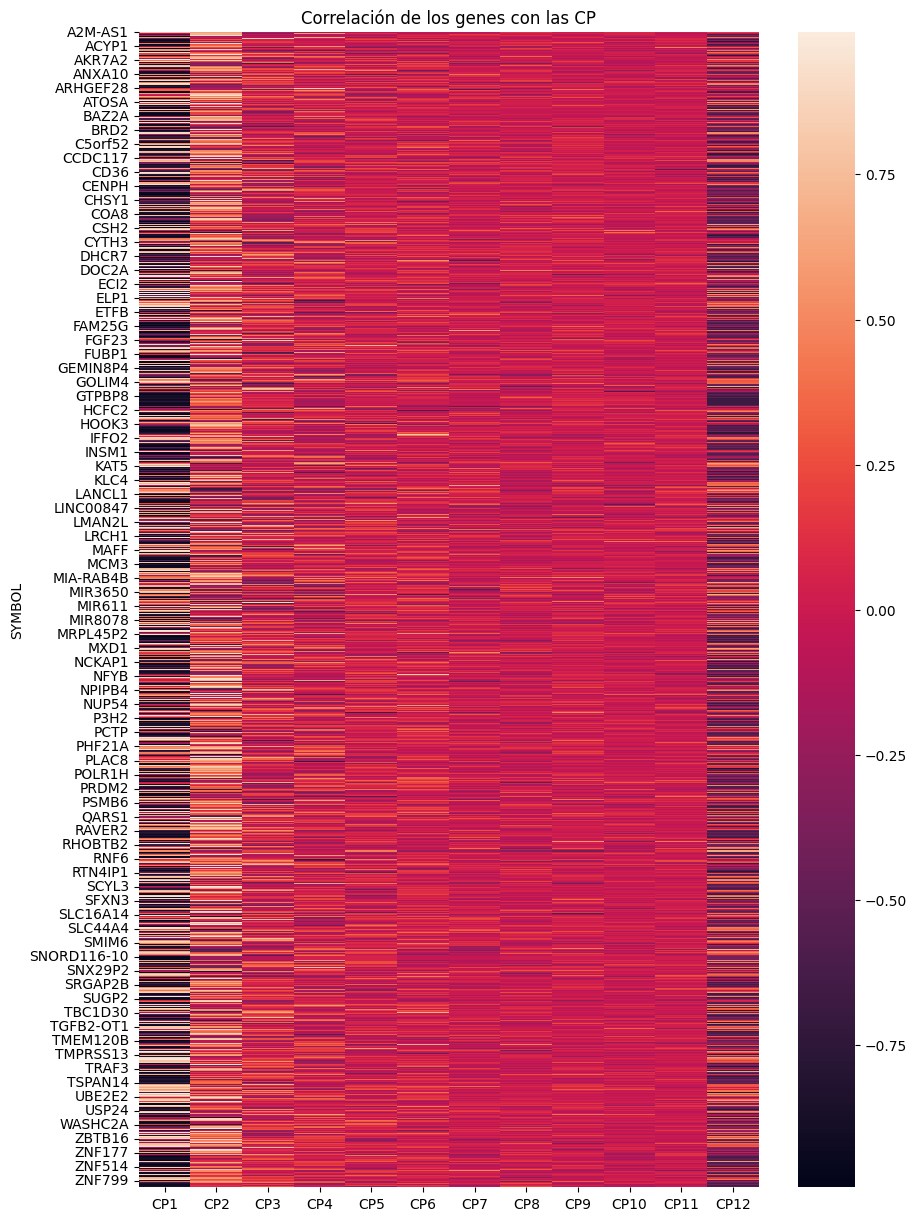

In [19]:
# Heatmap de las correlaciones
plt.figure(figsize=(10, 15))
sns.heatmap(df_correlaciones)
plt.title("Correlación de los genes con las CP")
plt.show()


El heatmap revela patrones claros de correlación entre los genes y las componentes principales (CPs). Se observan bloques de genes que muestran correlaciones positivas o negativas significativas con ciertas CPs, lo que indica que estos genes podrían estar contribuyendo de manera importante a las variaciones capturadas por esas componentes. Estos patrones sugieren que existen grupos de genes que responden de manera coordinada a las condiciones biológicas representadas por las CPs, lo que podría reflejar procesos biológicos subyacentes relevantes para el estudio. 

Como era de esperar, las mayores correlaciones se observan en las dos primeras componentes principales (CP1 y CP2), lo que sugiere que estos ejes de variación son particularmente informativos en términos de la expresión génica. Este hallazgo podría orientar futuros análisis hacia la identificación de genes clave asociados con las condiciones experimentales estudiadas. No obstante, también se observan correlaciones muy elevadas (en valor absoluto) con la CP12, incluso más que con la CP2. De hecho, si se hace un análisis estadístico de las correlaciones (tabla siguiente), se observa que las correlaciones de los genes con la CP12 presentan un patrón muy similar al observado en la CP1. Por ejemplo, la media y mediana de las correlaciones de la expresión de los genes con la CP1 es muy parecida a la observada para la CP12; también se puede ver como la desviación típica de dichas correlaciones es la 3ª más alta. Incluso, presenta la mayor suma, en valor absoluto, de estas correlaciones, siendo la segunda más alta para la CP1.

Esto sugiere que la CP12 podría estar capturando una variabilidad biológica significativa que merece una investigación más detallada.

In [20]:
# Estadísticas de correlaciones
cor_desc = df_correlaciones.describe().T
cor_sum = df_correlaciones.sum(axis=0)

# Juntar ambos DataFrames
cor_stats = cor_desc.join(cor_sum.rename("Suma"))

cor_stats

,count,mean,std,min,25%,50%,75%,max,Suma
CP1,9073.0,-0.177425,0.714189,-0.994364,-0.872568,-0.413231,0.588865,0.994682,-1609.773191
CP2,9073.0,0.208655,0.428412,-0.947546,-0.127574,0.232917,0.544665,0.991376,1893.126610
CP3,9073.0,0.029754,0.259181,-0.835078,-0.128149,0.026436,0.186273,0.915939,269.959513
CP4,9073.0,0.019001,0.219699,-0.841819,-0.126828,0.013188,0.156365,0.879698,172.397893
CP5,9073.0,0.019414,0.161726,-0.701755,-0.075286,0.015676,0.113317,0.711339,176.147677
CP6,9073.0,0.036237,0.154568,-0.719791,-0.053494,0.032841,0.125302,0.828613,328.777187
CP7,9073.0,-0.000898,0.128349,-0.745264,-0.070486,-0.004787,0.063627,0.776553,-8.146958
CP8,9073.0,-0.008424,0.120551,-0.709319,-0.067201,-0.005513,0.056279,0.736522,-76.426546
CP9,9073.0,0.010696,0.109861,-0.604447,-0.042409,0.006742,0.064662,0.677123,97.041150
CP10,9073.0,-0.009488,0.101959,-0.615458,-0.055913,-0.005069,0.039698,0.689393,-86.086620


También podría ser interesante representar las muestras en el espacio definido por todas las CP, dos a dos, para observar si existen patrones de agrupamiento adicionales que no se capturan en las primeras dos CPs.

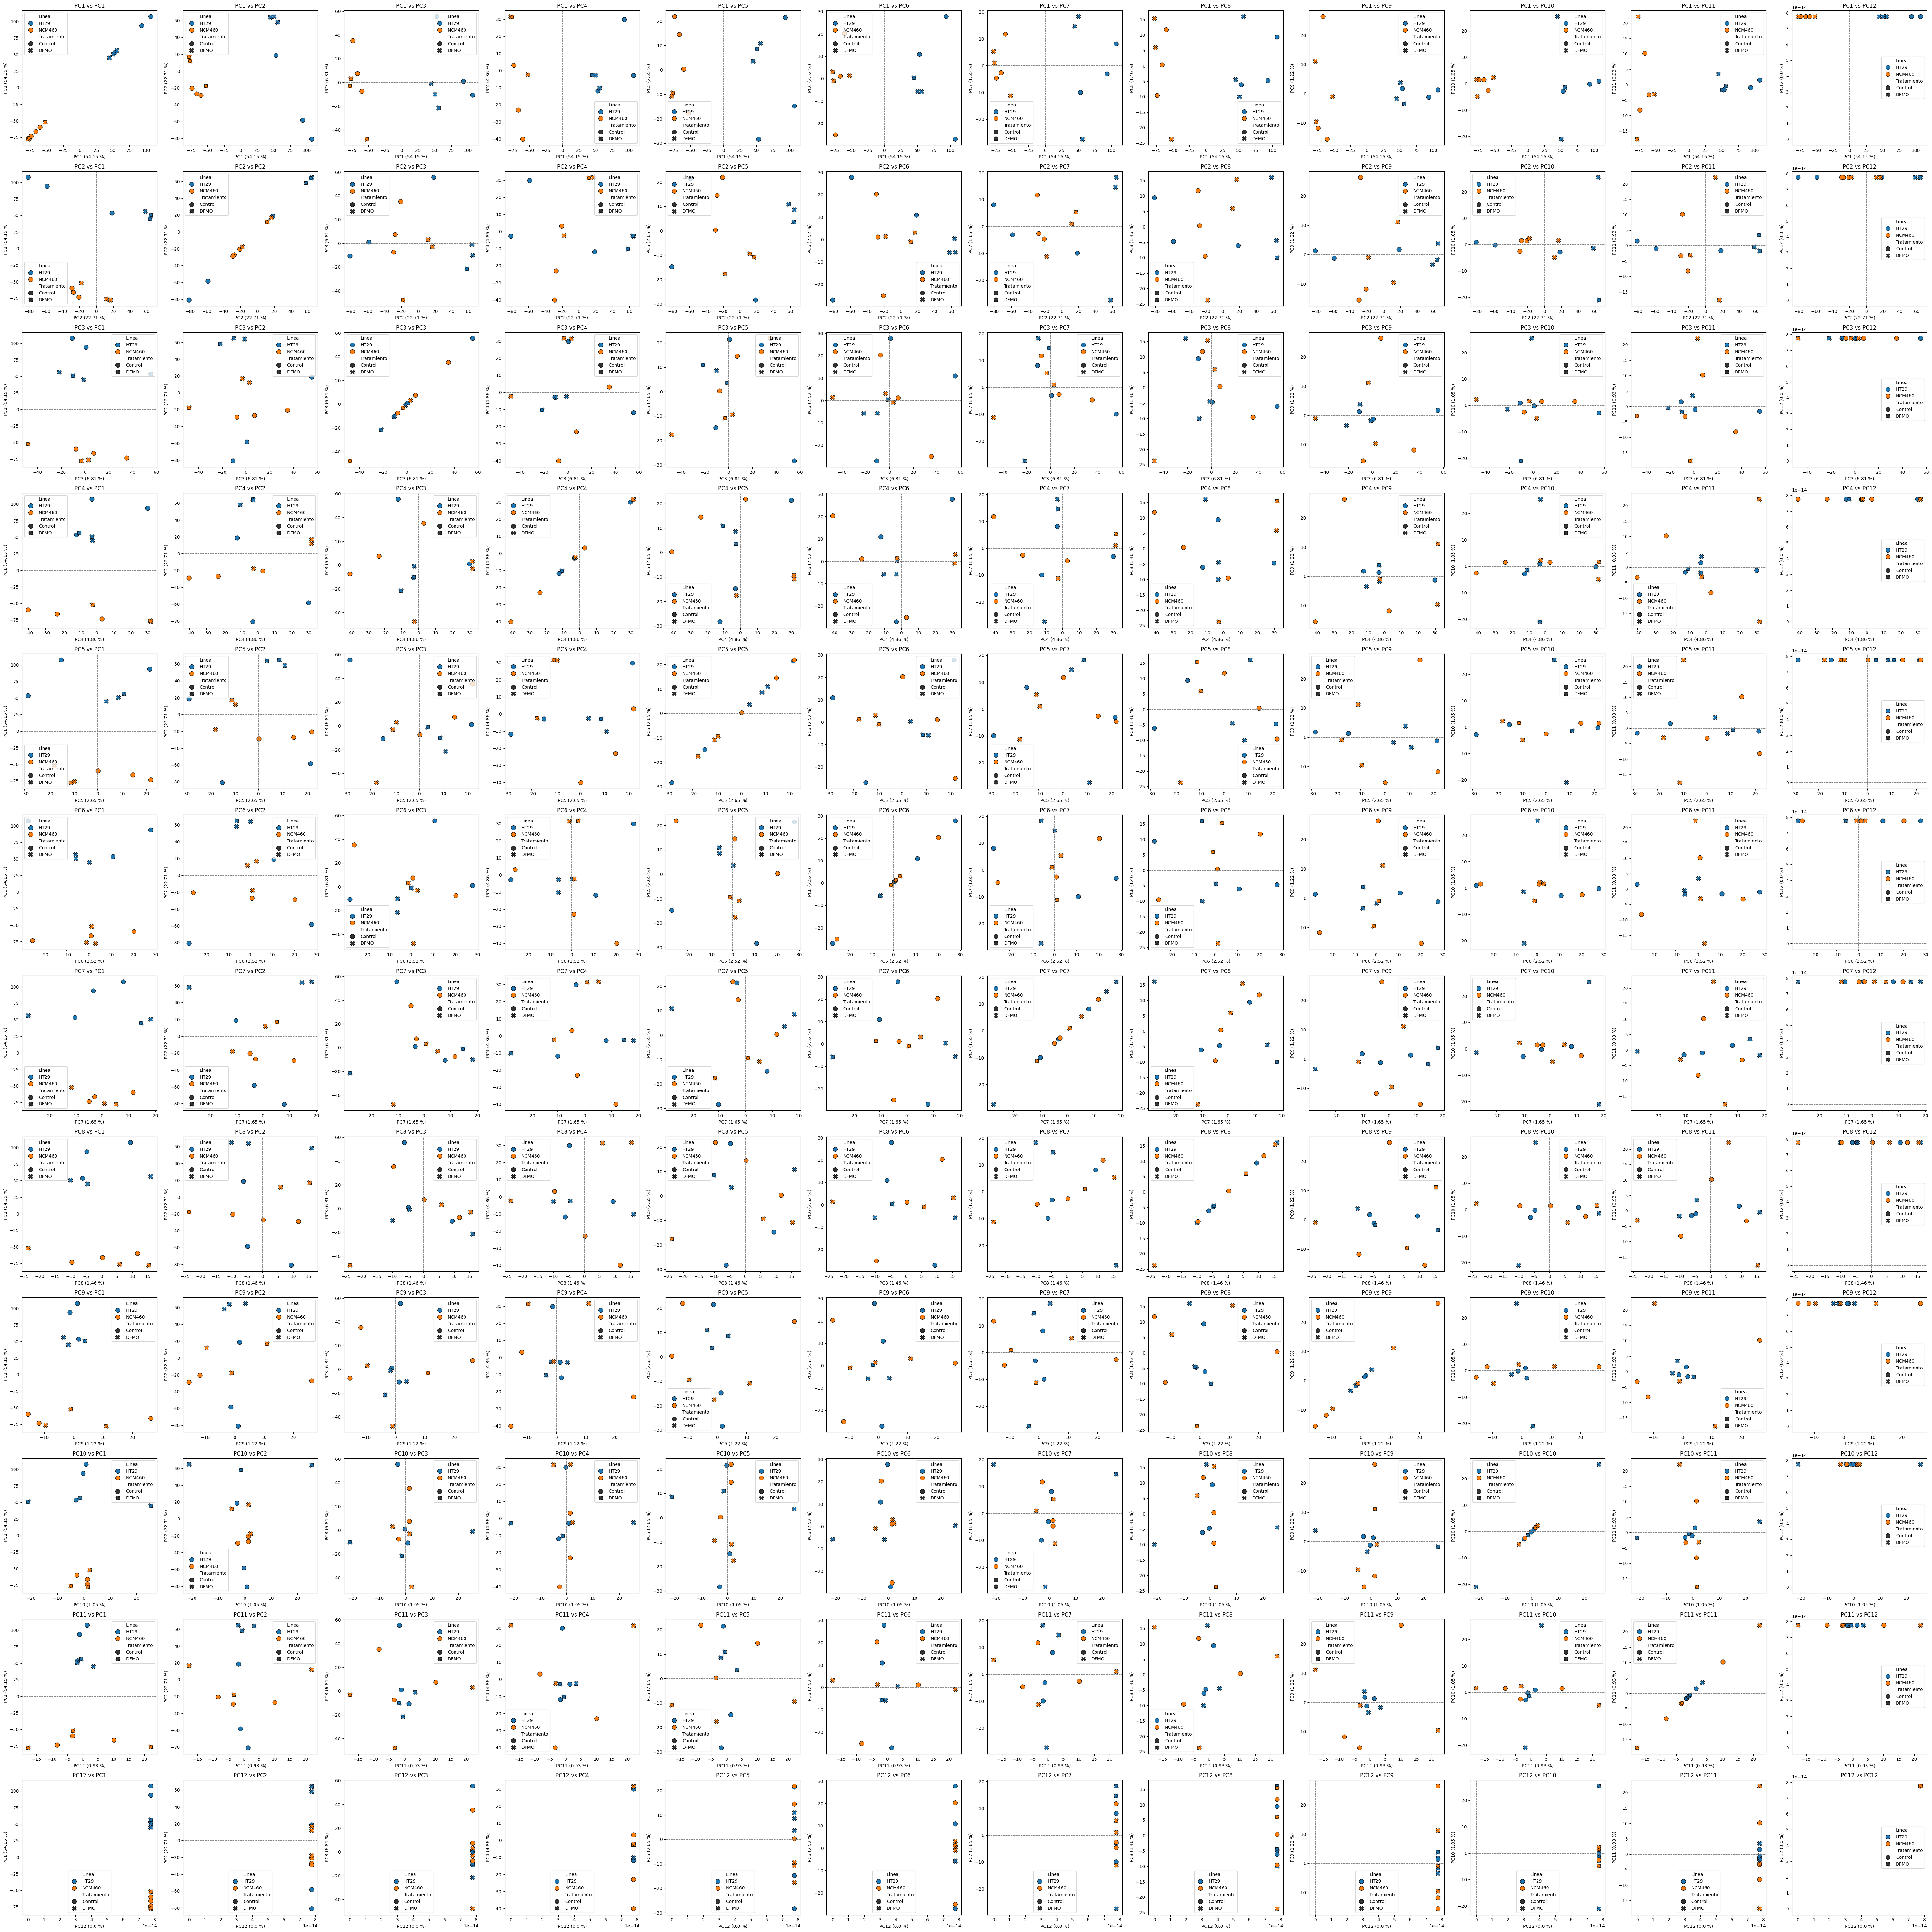

In [21]:
# Gráficos de dispersión de las muestras en el espacio definido por todas las CP, dos a dos
nrows = scores.shape[1] # Subplots en cada columna de la figura
ncols = scores.shape[1] # Subplots en cada fila dentro de la figura
fig = plt.figure(figsize=(5*ncols, 5*nrows)) # Crear el "fondo" de la figura
plot_idx = 1 # Índice del subplot
for i in range(scores.shape[1]): # Iterar sobre cada CP
    for j in range(scores.shape[1]): # Iterar sobre cada CP siguiente
        plt.subplot(nrows, ncols, plot_idx)
        sns.scatterplot(
            x=scores[:, i],
            y=scores[:, j],
            hue=df_covariables["Linea"],
            style=df_covariables["Tratamiento"],
            s=100,
            edgecolor="black"
        )
        plt.title(f"PC{i+1} vs PC{j+1}")
        plt.xlabel(f"PC{i+1} ({(var_exp_p[i]*100).round(2)} %)")
        plt.ylabel(f"PC{j+1} ({(var_exp_p[j]*100).round(2)} %)")
        plt.axhline(0, color='gray', linestyle='--', linewidth=0.7)
        plt.axvline(0, color='gray', linestyle='--', linewidth=0.7)
        plot_idx += 1
plt.tight_layout()
plt.show()

## Correlación de la expresión de genes con la CP "discriminantes"

En el análisis previo de PCA se observó que la CP1 era capaz de discriminar perfectamente entre las dos líneas celulares presentes en el experimento: HT29 (cáncer de colon) y NCM460 (mucosa de colon normal). Dado este hallazgo, resulta relevante profundizar en la relación entre la expresión génica y esta componente principal específica.

Además, también se puede observar cómo la CP2 es capaz de discriminar, en cierta medida, entre las muestras tratadas y no tratadas con DFMO, especialmente dentro de la línea celular tumoral. Por ello, también se realizará la correlación de la expresión génica con esta componente principal.

En cuanto a la correlación, se empleará la correlación de Spearman, pues esta es más robusta frente a posibles outliers y a la violación de la normalidad bivariante para aquellos genes que no la cumplan.

Para poder evaluar si realmente existe tal correlación, se va a emplear el estadístico t, pues la correlación sigue, aproximadamente:

$$r\sim t_{n-2}=r\cdot \sqrt{\frac{n - 2}{1-r^2}}$$

Además, para evitar el problema de las comparaciones múltiples, se corrige el p valor resultante mediante FDR.


In [22]:
fig = px.scatter(
    df_pca,
    x="PC1",
    y="PC2",
    color="Linea",
    symbol="Trt",
    hover_data=df_pca,
    title="PCA",
    labels={
        "PC1": f"PC1 ({(var_exp_p[0]*100).round(2)} %)",
        "PC2": f"PC2 ({(var_exp_p[1]*100).round(2)} %)"
    }
)
# Ejes
rango = max(abs(df_pca["PC1"]).max(), abs(df_pca["PC2"]).max())
fig.update_xaxes(range=[-rango*1.1, rango*1.1], zeroline=True, zerolinecolor="gray")
fig.update_yaxes(range=[-rango*1.1, rango*1.1], zeroline=True, zerolinecolor="gray", scaleanchor="x", scaleratio=1)
fig.update_traces(marker=dict(size=10, line=dict(width=1, color='black')))
fig.update_layout(width=700, height = 700)
fig.show()

### Correlación con la CP1: discriminar entre líneas celulares

En el presente data set se tienen dos líneas celuluares: HT29, de cáncer de colon, y NCM460, mucosa de colon normal. En vistas a que la CP1 es capaz de discriminar perfectamente entre ambas líneas celulares, con el fin de encontrar qué genes trabajan de forma conjunta, en la "dirección tumoral", se va a hacer la correlación de la expresión de cada uno de ellos con dicha componente principal.

Anteriormente vimos que a la izquiera de dicha componente están las muestras tumorales y a la derecha las normales. Así, para una interpretación más intuitiva con la CP1, se cambia esta de signo de tal manera que a valores altos de CP1 estén las tumorales y a valores bajos las normales. De esta manera, una correlación positiva indicará mayor expresión en la dirección del tumor, y viceversa.

En cuanto a la correlación, se empleará la correlación de Spearman, pues esta es más robusta frente a posibles outliers y a la violación de la normalidad bivariante para aquellos genes que no la cumplan.

In [ ]:
from scipy.stats import t
from statsmodels.stats.multitest import multipletests

# Correlación de cada gen con PC1
df_scores = pd.DataFrame(scores, 
                         columns = [f"PC{i+1}" for i in range(scores.shape[1])],
                         index = sample_names) # Los indices superimportante; han de ser los nombres de las muestras
                                               # y conincidir con los de df_exp_filt para la correlación, si no, todo NaN.
# Cambiar el signo de PC1 para que valores altos correspondan a tumorales
pc1_sign_flip = -df_scores["PC1"]
# Calcular la correlación de Spearman de cada gen con la nueva PC1
r_PC1 = pd.DataFrame(df_exp_filt.T.corrwith(pc1_sign_flip, method="spearman"), columns=["r_PC1"])

# Estadístico de contraste
n_muestras = len(sample_names) # Número de muestras
t_stat = r_PC1["r_PC1"] * np.sqrt((n_muestras - 2) / (1-r_PC1["r_PC1"]**2))
p_val = 2 * t.sf(np.abs(t_stat), df = n_muestras - 2)
# Ajustar el p valor con FDR
_, p_adj, _, _ = multipletests(p_val, method='fdr_bh')

# Guardar en el df
r_PC1["t"] = t_stat
r_PC1["p valor"] = p_val
r_PC1["p ajustado"] = p_adj
# a Añadir enlace
url = ["https://www.genecards.org/cgi-bin/carddisp.pl?gene=" + gene for gene in r_PC1.index]
r_PC1["enlace"] = [f'<a href="{u}" target="_blank">{name}</a>' for u, name in zip(url, r_PC1.index)]

# Ordenar por r_PC1
r_PC1 = r_PC1.sort_values("r_PC1", ascending=False)

# Guardar resultados
r_PC1.to_csv("../resultados/correlacion_genes_PC1.csv")

In [24]:
# Genes significativamente correlacionados con PC1
alpha = 0.05
n_genes_cor_pc1 = (r_PC1["p ajustado"] <= alpha).sum()
n_genes_cor_pc1_pos = ((r_PC1["p ajustado"] <= alpha) & (r_PC1["r_PC1"] > 0)).sum()
n_genes_cor_pc1_neg = ((r_PC1["p ajustado"] <= alpha) & (r_PC1["r_PC1"] < 0)).sum()
print(f'En total, hay {n_genes_cor_pc1} que "trabajan" significativamente (alpha = {alpha}) de forma coordinada en la dirección tumoral:')
print(f'     -{n_genes_cor_pc1_pos} aumentan en la dirección tumoral.')
print(f'     -{n_genes_cor_pc1_neg} disminuyen en la dirección tumoral')

En total, hay 5745 que "trabajan" significativamente (alpha = 0.05) de forma coordinada en la dirección tumoral:
     -3950 aumentan en la dirección tumoral.
     -1795 disminuyen en la dirección tumoral


A continuación, se muestra el top de los 15 genes con mayor correlación positiva y negativa presentancon CP1:

- Correlación Positiva con CP1 (mayor expresión en tumorales):

In [25]:
from IPython.display import HTML
HTML(r_PC1.head(15).to_html(escape=False))

,r_PC1,t,p valor,p ajustado,enlace
SYMBOL,,,,,
PSMD9,1.000000,inf,0.000000e+00,0.000000e+00,PSMD9
GLRX2,0.993007,26.599037,1.301673e-10,9.841733e-08,GLRX2
ENTR1,0.993007,26.599037,1.301673e-10,9.841733e-08,ENTR1
EFCAB11,0.993007,26.599037,1.301673e-10,9.841733e-08,EFCAB11
SELENBP1,0.993007,26.599037,1.301673e-10,9.841733e-08,SELENBP1
TRAPPC2,0.993007,26.599037,1.301673e-10,9.841733e-08,TRAPPC2
NFU1,0.993007,26.599037,1.301673e-10,9.841733e-08,NFU1
VPS8,0.993007,26.599037,1.301673e-10,9.841733e-08,VPS8
ZNF69,0.993007,26.599037,1.301673e-10,9.841733e-08,ZNF69


- Correlación Negativa con CP1 (mayor expresión en normales):

In [26]:
top_r_neg = r_PC1.sort_values("r_PC1", ascending=True)
HTML(top_r_neg.head(15).to_html(escape=False))

,r_PC1,t,p valor,p ajustado,enlace
SYMBOL,,,,,
NEU1,-0.979021,-15.194072,3.089801e-08,0.000004,NEU1
AKR1C3,-0.979021,-15.194072,3.089801e-08,0.000004,AKR1C3
SLC17A9,-0.972028,-13.087607,1.286812e-07,0.000010,SLC17A9
MIR6829,-0.972028,-13.087607,1.286812e-07,0.000010,MIR6829
MIR6877,-0.965035,-11.642357,3.880985e-07,0.000018,MIR6877
MIR6736,-0.965035,-11.642357,3.880985e-07,0.000018,MIR6736
KRT17,-0.965035,-11.642357,3.880985e-07,0.000018,KRT17
TSKU,-0.958042,-10.569779,9.543582e-07,0.000033,TSKU
FUT3,-0.958042,-10.569779,9.543582e-07,0.000033,FUT3



### Correlación con la CP2, muestras tratadas vs. no tratadas con DFMO

Del mismo modo que en el apartado anterior se ha correlacionado la expresión génica con la CP1, que es capaz de discriminar entre las dos líneas celulares, en este apartado se va a correlacionar la expresión génica con la CP2, que es capaz de discriminar, en cierta medida, entre las muestras tratadas y no tratadas con DFMO, especialmente dentro de la línea celular tumoral.

In [27]:
from IPython.display import HTML
# Correlación de cada gen con PC2
r_PC2 = pd.DataFrame(df_exp_filt.T.corrwith(df_scores["PC2"], method="spearman"), columns=["r_PC2"])

# Estadístico de contraste
t_stat = r_PC2["r_PC2"] * np.sqrt((n_muestras - 2) / (1-r_PC2["r_PC2"]**2))
p_val = 2 * t.sf(np.abs(t_stat), df = n_muestras - 2) 
# Ajustar el p valor con FDR
_, p_adj, _, _ = multipletests(p_val, method='fdr_bh')

# Guardar en el df
r_PC2["t"] = t_stat
r_PC2["p valor"] = p_val
r_PC2["p ajustado"] = p_adj
# a Añadir enlace
url = ["https://www.genecards.org/cgi-bin/carddisp.pl?gene=" + gene for gene in r_PC2.index]
r_PC2["enlace"] = [f'<a href="{u}" target="_blank">{name}</a>' for u, name in zip(url, r_PC2.index)]

# Ordenar por r_PC2
r_PC2 = r_PC2.sort_values("r_PC2", ascending=False)

In [28]:
# Genes significativamente correlacionados con PC2
alpha = 0.05
n_genes_cor_pc2 = (r_PC2["p ajustado"] <= alpha).sum()
n_genes_cor_pc2_pos = ((r_PC2["p ajustado"] <= alpha) & (r_PC2["r_PC2"] > 0)).sum()
n_genes_cor_pc2_neg = ((r_PC2["p ajustado"] <= alpha) & (r_PC2["r_PC2"] < 0)).sum()
print(f'En total, hay {n_genes_cor_pc2} que "trabajan" significativamente (alpha = {alpha}) de forma coordinada en la dirección del tratamiento:')
print(f'     -{n_genes_cor_pc2_pos} aumentan en la dirección del tratamiento.')
print(f'     -{n_genes_cor_pc2_neg} disminuyen en la dirección del tratamiento.')

En total, hay 1076 que "trabajan" significativamente (alpha = 0.05) de forma coordinada en la dirección del tratamiento:
     -1002 aumentan en la dirección del tratamiento.
     -74 disminuyen en la dirección del tratamiento.


A continuación, se muestra el top de los 15 genes con mayor correlación positiva y negativa presentan con CP2:

- Correlación Positiva con CP2 (mayor expresión en líneas tratadas con DFMO):

In [29]:
HTML(r_PC2.head(15).to_html(escape=False))

,r_PC2,t,p valor,p ajustado,enlace
SYMBOL,,,,,
CRLS1,0.993007,26.599037,1.301673e-10,0.000001,CRLS1
IPP,0.986014,18.708757,4.116896e-09,0.000009,IPP
NORAD,0.986014,18.708757,4.116896e-09,0.000009,NORAD
ULBP3,0.979021,15.194072,3.089801e-08,0.000031,ULBP3
ENC1,0.979021,15.194072,3.089801e-08,0.000031,ENC1
NSUN3,0.979021,15.194072,3.089801e-08,0.000031,NSUN3
TMEM139,0.979021,15.194072,3.089801e-08,0.000031,TMEM139
MIOS-DT,0.979021,15.194072,3.089801e-08,0.000031,MIOS-DT
SLITRK6,0.972028,13.087607,1.286812e-07,0.000058,SLITRK6


- Correlación Negativa con CP2 (mayor expresión en líneas no tratadas):

In [30]:
top_r_neg = r_PC2.sort_values("r_PC2", ascending=True)
HTML(top_r_neg.head(15).to_html(escape=False))

,r_PC2,t,p valor,p ajustado,enlace
SYMBOL,,,,,
SAT1,-0.986014,-18.708757,4.116896e-09,0.000009,SAT1
TENT4B,-0.944056,-9.052455,3.927261e-06,0.000396,TENT4B
RAB3IL1,-0.944056,-9.052455,3.927261e-06,0.000396,RAB3IL1
DAPK3,-0.937063,-8.486794,6.993165e-06,0.000577,DAPK3
MIR637,-0.937063,-8.486794,6.993165e-06,0.000577,MIR637
NPAS2,-0.937063,-8.486794,6.993165e-06,0.000577,NPAS2
CAPN5,-0.930070,-8.005659,1.170223e-05,0.000817,CAPN5
LCP1,-0.916084,-7.224460,2.842805e-05,0.001323,LCP1
CACNA1H,-0.916084,-7.224460,2.842805e-05,0.001323,CACNA1H


### Correlación con la CP12

Como se vio anteriormente, la CP12 presenta un patrón de correlaciones, a nivel general (no gen a gen) con los genes muy similar al observado para la CP1. Por ello, se va a llevar a cabo el mismo análisis de correlación de la expresión génica con la CP12 para ver qué genes están asociados a esta componente principal.

In [ ]:

fig = px.scatter(
    df_pca,
    x="PC1",
    y="PC12",
    color="Trt",
    symbol="Dia",
    hover_data=df_pca,
    title="PCA",
    labels={
        "PC1": f"PC1 ({(var_exp_p[0]*100).round(2)} %)",
        "PC12": f"PC12 ({(var_exp_p[11]*100).round(2)} %)"
    }
)
# Ejes
rango = max(abs(df_pca["PC1"]).max(), abs(df_pca["PC12"]).max())
fig.update_xaxes(range=[-rango*1.1, rango*1.1], zeroline=True, zerolinecolor="gray")
# redondear los valores del eje y a 2 decimales en notación científica
fig.update_yaxes(zeroline=True, zerolinecolor="gray", tickformat=".2ec")
fig.update_traces(marker=dict(size=10, line=dict(width=1, color='black')))
fig.update_layout(width=700, height = 700)
fig.show()

Como puede observarse, la componente CP12, la cuál apenas presenta varianza explicada (0,0 %), podría estar capturando la variabilidad debida a los días en los que se ha realizado el experimento, dado que las muestras parecen agruparse según el día en el que fueron procesadas. Esto sugiere que la CP12 podría estar reflejando efectos técnicos o de lote relacionados con el momento del experimento, más que diferencias biológicas inherentes entre las muestras.